<a href="https://colab.research.google.com/github/haechis/ML_trial/blob/main/ML_trial_03_3_%ED%8A%B9%EC%84%B1_%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 특성 공학과 규제

- 선형 회귀

선형 회귀는 특성이 많을수록 엄청난 효과를 냅니다.

- 다중 회귀

선형 회귀를 사용할 때는 하나의 특성을 사용하였습니다.
하나의 특성을 사용했을 때 선형 회귀 모델이 학습하는 것은 '직선'입니다.

다중 회귀는 여러 개의 특성을 사용한 선형 회귀입니다.

2개의 특성을 사용했을 때 선형 회귀 모델이 학습하는 것은 '평면'입니다.

y = a * x1 + b * x2 + c 

(where, y: 타깃, x1: 특성1, x2: 특성2, c: 절편)

특성이 많은 고차원에서는 선형 회귀가 매우 복잡한 모델을 표현할 수 있습니다.

- 특성 공학 (feature engineerign)

농어 예제의 경우 길이와 높이와 같은 특성 외에 '농어의 길이 x 농어의 높이'를 새로운 특성으로 만드는 것을 특성 공학이라고 합니다.

# 데이터 준비

- 판다스

데이터 분석 라이브러리입니다. 데이터프레임(dataframe)은 판다스의 핵심 데이터 구조입니다.  

csv 파일을 손쉽게 배열로 변환할 수 있습니다. 

# 핵심 패키지와 함수
- pandas: read_csv()

- scikit-learn: PolynomialFeatures, Ridge, Lasso

In [1]:
import pandas as pd # pd는 관례적인 판다스의 별칭입니다.
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)
# 농어의
# c1(길이), c2(높이), c3(두께)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
# 타깃 데이터
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
# perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나눕니다.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

- 사이킷런의 변환기

변환기(transformer): 사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스 제공합니다. 

여러 변환기 중에서 sklearn.preprocessing 패키지의 PolynomialFeatures 클래스를 사용하겠습니다.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
## poly.fit
# 2와 3의 특성공학을 이용하여 만들 수 있는 조합을 구합니다.
poly.fit([[2,3]])
# 1(기본), 2, 3, 4(2x2), 6(2x3), 9(3x3)
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [5]:
# poly.fit에서 절편을 의미하는 1(기본)을 제외하려면 아래와 같은 방법을 사용하면 됩니다.
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [6]:
## 위에서 알아본 내용을 이용하여 train_input을 변환한 데이터를 train_poly에 저장하고 배열의 크기를 확인하겠습니다.
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [7]:
# 9개의 특성이 어떻게 만들어졌는지 확인해 보겠습니다.
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [8]:
# 테스트 세트도 동일하게 변환하겠습니다.
test_poly = poly.transform(test_input)
# !! 훈련 세트를 기준으로 테스트 세트를 변환!!

## 다중 회귀 모델 훈련하기
- 다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같다. 
- 다만, 다중 회귀는 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것입니다.

In [10]:
# 사이킷런의 LinearRegression 클래스를 임포트하고, train_poly를 사용해 모델을 훈련해보겠습니다.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)


print(lr.score(train_poly, train_target))
## 매우 높은 점수가 나옵니다. 농어의 길이, 높이 , 두께 그리고 특성 공학을 사용하여 다중 회귀를 하였더니 훈련한 모델의 점수가 매우 높게 나옵니다.

0.9903183436982124


In [11]:
# 이제 테스트 세트에 대한 점수도 확인해보겠습니다.
print(lr.score(test_poly, test_target))
## 점수는 다소 낮지만, 과소적합 문제가 사라진 것으로 보입니다!

0.9714559911594134


In [12]:
## 특성을 더 많이 추가하여 모델을 복잡하게 한다면 어떻게 될까요? -> 5제곱까지 특성을 만들어 보겠습니다.
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [13]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly,train_target))

0.9999999999991097


In [14]:
print(lr.score(test_poly, test_target))
## 특성 개수가 너무 많아지니 훈련 세트에 너무 "과대 적합"한 결과가 나옵니다!!

-144.40579242684848


# 규제 (Regularization)
- 모델이 훈련 세트에 과대적합되지 않도록 규제하는 것입니다.
- 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 
일입니다.

그 전에 먼저 "정규화"를 해야 합니다.
이전과 같이, 평균과 표준편차를 이용하는 표준점수로 정규화 하겠습니다.

In [15]:
## 정규화하고, 특성 공학을 적용합니다.
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 릿지 (Ridge) 와 라쏘 (Lasso)
- 선형 회귀 모델에 규제를 추가한 모델을 릿지와 라쏘라고 합니다.

# 릿지 (Ridge)
- 계수를 제곱한 값을 기준으로 규제를 적용
- 일반적으로 더 선호됨

# 라쏘 (Lasso)
- 계수의 절댓값을 기준으로 규제를 적용


In [17]:
## ! - 릿지 회귀 - ! ##
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [18]:
print(ridge.score(test_scaled, test_target))

0.9790693977615391


# 릿지 회귀에서 하이퍼 파라미터
alpha 값이 크면 규제 강도가 세지므로, 계수 값을 더 줄이고 조금 더 과소적합되도록 유도합니다. 

alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 큽니다.

alpha 값이 크면 --> 더 많이 규제 한다" --> 과소적합

alpha 값이 작으면 --> 규제가 적어진다. --> 과대적합 " 정도로 이해하실 수 있겠습니다.

- 적절한 alpha 찾기!

alpha에 대한 R^2 값의 그래프를 그려보면 됩니다.

훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 됩니다.

In [19]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

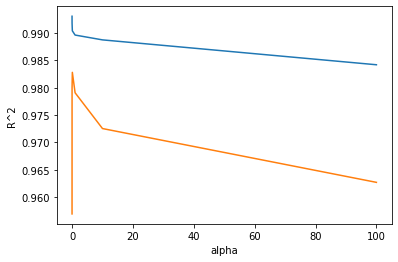

In [20]:
# alpha 값을 0.001 ~ 100 까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 파이썬 리스트에 저장합니다.
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 릿지 모델 만듭니다.
  ridge = Ridge(alpha = alpha)
  # 릿지 모델 훈련
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장합니다.
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

# 가시화 합니다.
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()


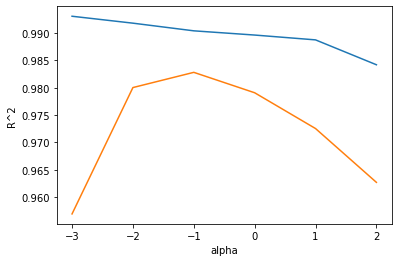

In [21]:
# 특성을 잘 확인하기 위해
# x축에 자연로그를 취해보겠습니다.

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

위 그래프에서, 트레이닝 세트와 테스트 세트의 R^2가 가장 가까운 지점은 ln(alpha) = -1 즉, alpha = 10^-1 = 0.1 입니다.

따라서 alpha를 0.1로 하여 최종 모델을 훈련하겠습니다.

In [22]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


In [26]:
## ! - 라쏘 회귀 - ! ##
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


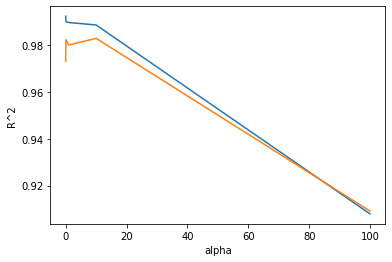

In [29]:
# 라쏘에서 최적의 alpha 값 구하기 #
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 라쏘 모델 만듭니다.
  lasso = Lasso(alpha = alpha, max_iter = 10000)
  # 라쏘 모델 훈련
  lasso.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장합니다.
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

# 가시화 합니다.
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()


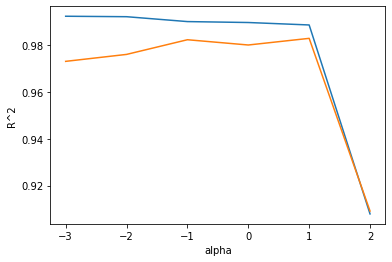

In [30]:
# 역시 자연로그를 이용합니다.
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 파란색이 훈련, 주황색이 테스트입니다.
# 1 이후에는 테스트 세트의 점수가 훈련 세트의 점수보다 높은 구간에서 과소적합니 일어나는 것입니다.
# 따라서 라쏘에서 alpha의 최대값은 자연로그를 1로 만드는 즉, alpha = 10입니다.

In [31]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [32]:
print(np.sum(lasso.coef_ == 0))

40


총 55개 특성 중 40개를 제외한 15개의 특성만 이용하여 학습한 것입니다.

라쏘 모델을 유용한 특성을 골라내는 용도로도 사용할 수 있습니다.